
# Input referred AD797A voltage noise

Working with circuit defined in ad797a_vnoisevalidation.asc.  Comparing simulated input referred voltage noise to [datasheet](https://www.analog.com/media/en/technical-documentation/data-sheets/AD797.pdf):

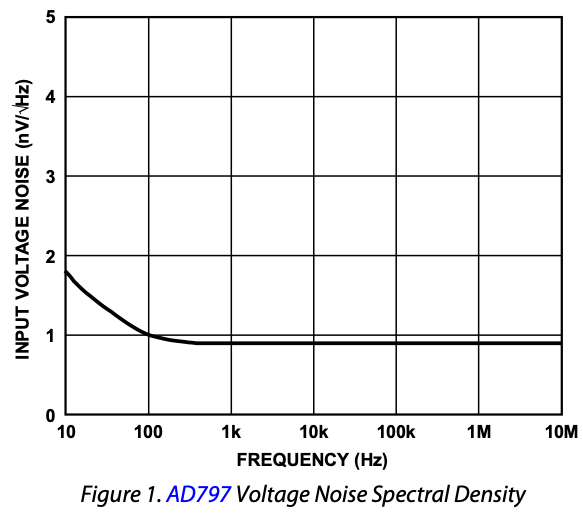

Measuring at a few frequencies using an [online plot digitizer](https://apps.automeris.io/wpd/);
<br><br>
10 Hz  :  1.81 nV/rt.Hz
<br>
100 Hz :  1.00 nV/rt.Hz
<br>
1 kHz  : 0.905 nV/rt.Hz
<br>
10 kHz : 0.900 nV/rt.Hz

Test circuit:

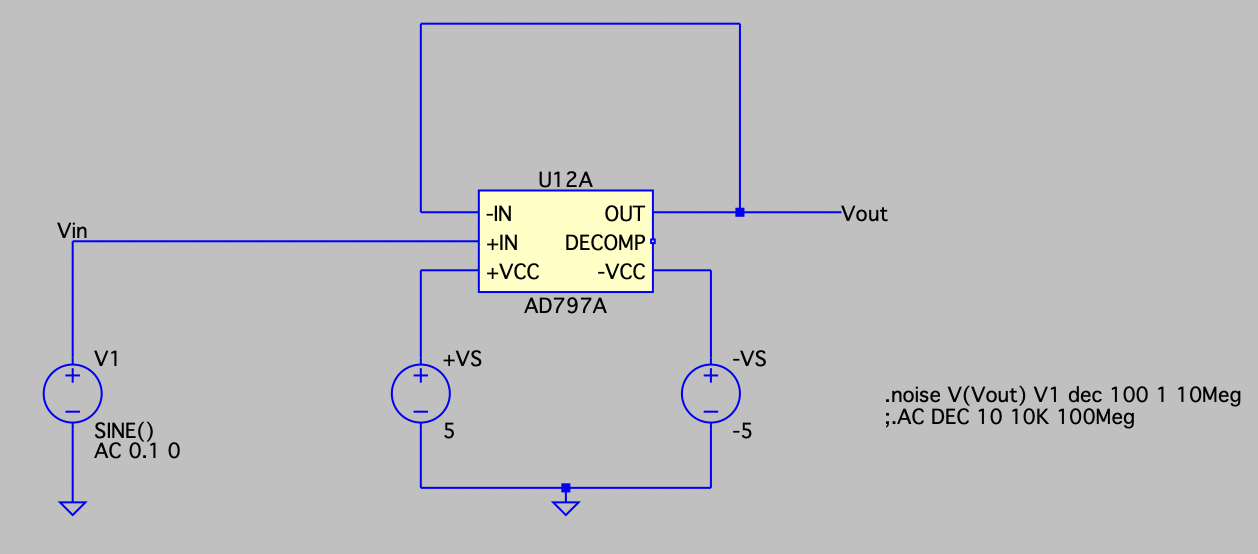

Looking at noise sims, measure V(inoise) from above noise simulation:
<br><br>
10 Hz   :  1.75 nV/rt.Hz<br>
100 Hz  :  1.02 nV/rt.Hz<br>
1  kHz  :  0.915 nV/rt.Hz<br>
10 kHz  :  0.904 nV/rt.Hz<br>
<br>
all agree within 5%.

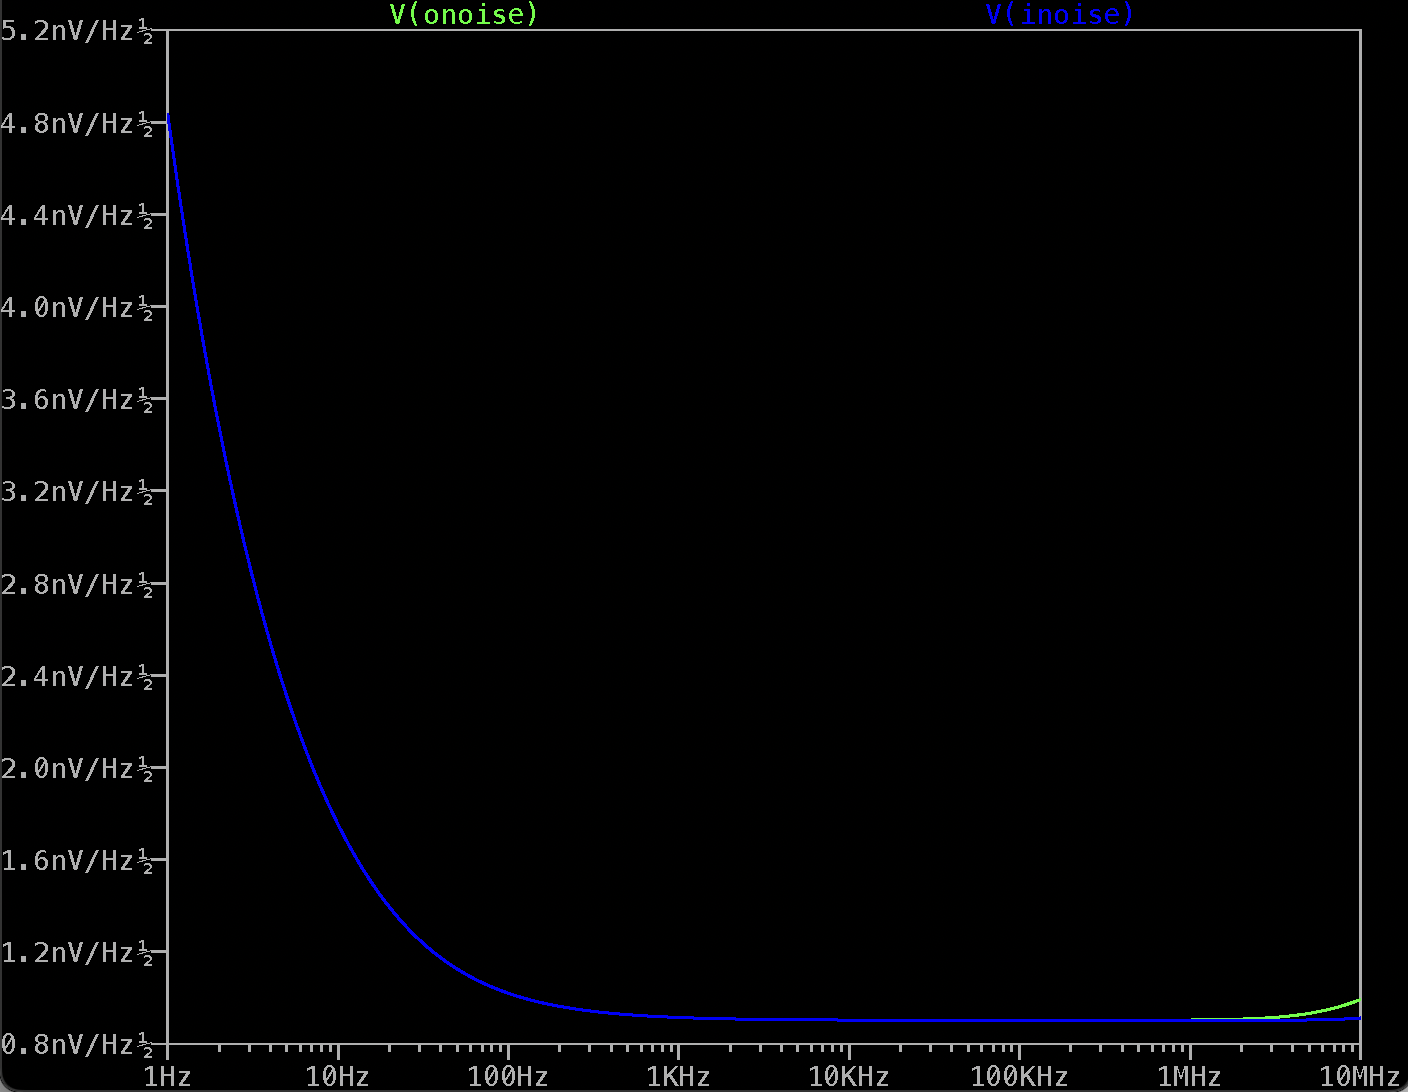


# Input referred AD797A current noise

Working with circuit defined in ad797a_inoisevalidation_noninvertinginput.asc.  Comparing simulated input referred current noise to [datasheet](https://www.analog.com/media/en/technical-documentation/data-sheets/AD797.pdf):

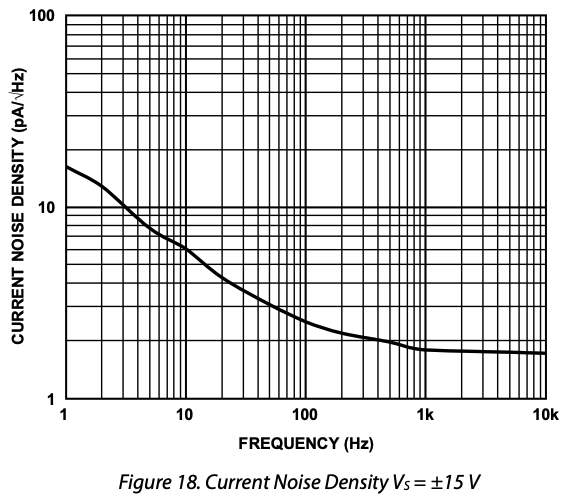

This is at +/-15V, but MCE rev B RC card runs these with +/-5V rails.  This may? make the current noise worse.  But maybe? this is captured in the SPICE macromodel.  First look at current noise on noninverting input by loading it with a 10kOhm resistor.  at 10kHz this should look like ~ (2pA/rt.Hz)*(10 kOhm) = 20nV/rt.Hz RTI (=Referred to Input).  Resistor is noiseless to eliminate Johnson noise contribution from the 10kOhm test resistor.

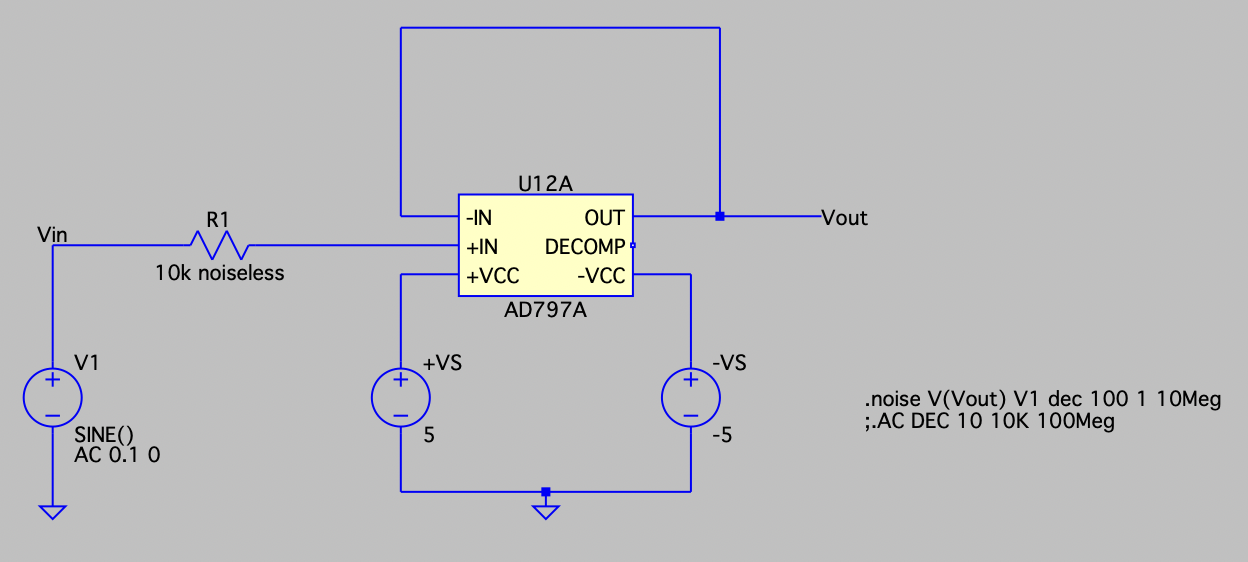

Running noise analysis on this circuit, I see:

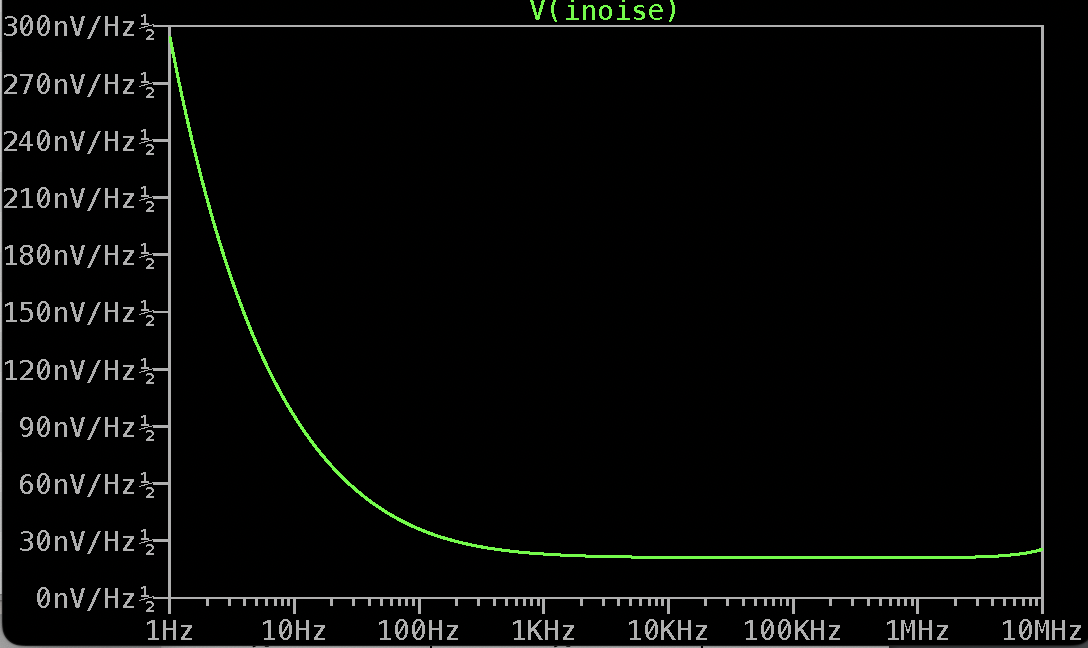

So<br>
<br>
  1  Hz :  295 nV/rt.Hz<br>
 10  Hz : 95.3 nV/rt.Hz<br>
100  Hz : 36.2 nV/rt.Hz<br>
  1 kHz : 23.0 nV/rt.Hz<br>
 10 kHz : 21.3 nV/rt.Hz<br>
 <br>
 To convert to current noise, need to remove input referred amplifier voltage noise (from above) and then divide by 10kOhm.  So (only comparing 10 Hz and above for which there is datasheet input referred voltage noise):<br><br>
 10  Hz : sqrt( (95.3 nV/rt.Hz)^2 - (1.75 nV/rt.Hz)^2 )/(10 kOhm) = 9.53 pA/rt.Hz<br>
100  Hz : sqrt( (36.2 nV/rt.Hz)^2 - (1.02 nV/rt.Hz)^2 )/(10 kOhm) = 3.62 pA/rt.Hz<br>
  1 kHz : sqrt( (23.0 nV/rt.Hz)^2 - (0.915 nV/rt.Hz)^2 )/(10 kOhm) = 2.30 pA/rt.Hz<br>
 10 kHz : sqrt( (21.3 nV/rt.Hz)^2 - (0.904 nV/rt.Hz)^2 )/(10 kOhm) = 2.13 pA/rt.Hz<br>
 <br>
 Coming in high compared to datasheet.  Changing rails from +/-5V to +/-15V doesn't make a difference in the simulated noise.  Pulling from datasheet plot:<br><br>
  1  Hz : 16.3  pA/rt.Hz<br>
 10  Hz :  6.07 pA/rt.Hz<br>
100  Hz :  2.53 pA/rt.Hz<br>
  1 kHz :  1.80 pA/rt.Hz<br>
 10 kHz :  1.72 pA/rt.Hz<br>
 <br>
 Close-ish but not amazing agreement - SPICE model is high by ~20-40%, and worse at lower frequencies.

Repeating same, but with resistor in feedback loop to check current noise on inverting input, ad797a_inoisevalidation_invertinginput.asc:

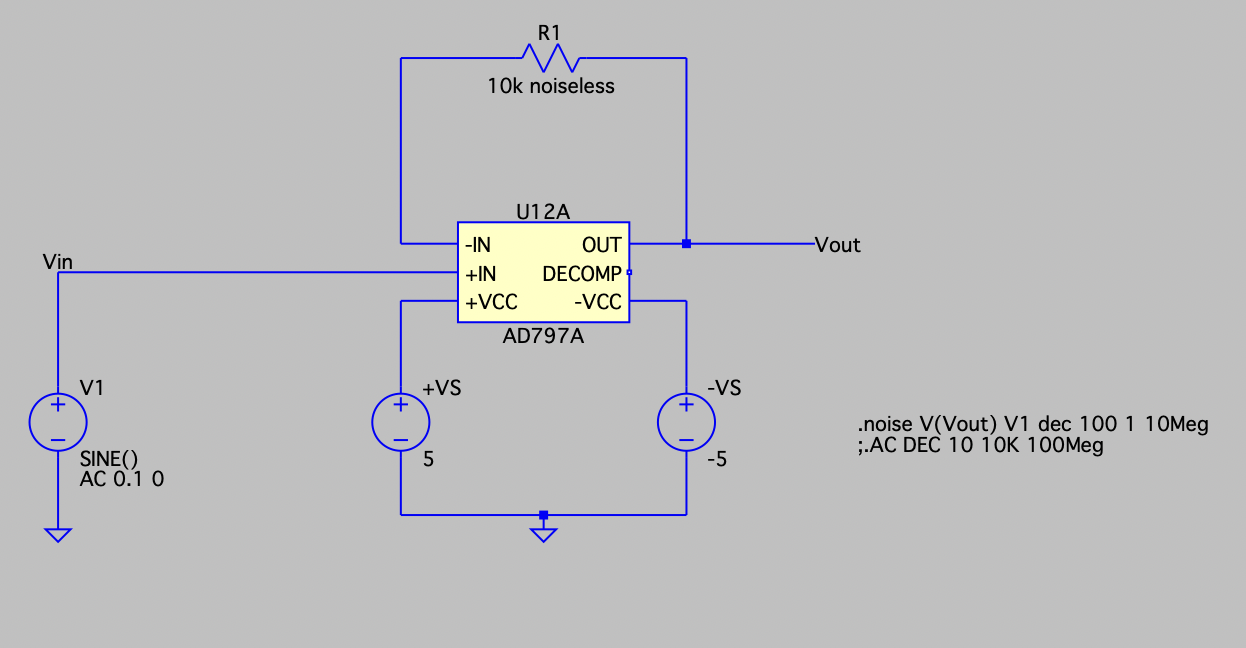

Also see 21.3 nV/rt.Hz at 10 kHz, so the model is assuming the same current noise independently on each input.